In [148]:
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [120]:
X_train.shape

(60000, 28, 28)

In [121]:
y_train.shape

(60000,)

In [122]:
X_test.shape

(10000, 28, 28)

In [123]:
y_test.shape

(10000,)

In [124]:
# We can see the range is 0 - 255 - so we can divide by 255 to convert in a range 0 - 1

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [125]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [126]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [127]:
# getting the labels - classes - range(0 - 9)

classes  = np.unique(y_train)

In [128]:
# creating a plotting function

def plotSample(X, y,  index):
    plt.figure(figsize = (1, 1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

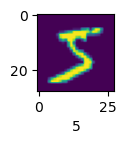

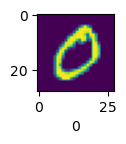

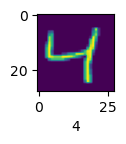

In [129]:
# showing various plots

for i in range(3):
    plotSample(X_train, y_train, i)

In [130]:
model = models.Sequential([
    #CNN layers
    layers.Conv2D(filters = 64, activation = "relu", kernel_size = (2, 2), input_shape =(28, 28, 1)),
    layers.MaxPooling2D(pool_size = (2, 2)),

    layers.Conv2D(filters = 32, activation = "relu", kernel_size = (2, 2)), 
    layers.MaxPooling2D(pool_size = (2, 2)),
    # flattening the feature map created using convolution
    layers.Flatten(),
    #ANN layers
    layers.Dense(6000, activation = "relu"),
    layers.Dense(2000, activation = "relu"),
    layers.Dense(400, activation = "relu"), 
    layers.Dense(10, activation = "softmax")             
])
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [131]:
# Expanding dimensions
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [132]:
X_train.shape

(60000, 28, 28, 1)

In [133]:
X_test.shape

(10000, 28, 28, 1)

In [134]:
model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 754s 402ms/step - loss: 0.1349 - accuracy: 0.9593
Epoch 2/3
1875/1875 [==============================] - 1660s 886ms/step - loss: 0.0593 - accuracy: 0.9841
Epoch 3/3
1875/1875 [==============================] - 845s 451ms/step - loss: 0.0457 - accuracy: 0.9884


In [138]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.0467 - accuracy: 0.9871


[0.04671259596943855, 0.9871000051498413]

In [139]:
y_pred = model.predict(X_test)

313/313 [==============================] - 6s 20ms/step


In [143]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [154]:
print("classification report \n", classification_report(y_test, y_pred_classes))

classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

